# Encrypt and decrypt the text

In [4]:
import encrypt
import decrypt
import re


with open('./data/krakatit.txt', 'r', encoding='utf-8') as file:
    text = file.read().replace(' ', '_').replace('\n', '_').upper()  # Replace spaces and newlines with underscores
text = re.sub(r'[^A-Z_]', '', text)  # Allow underscores

key = "TJCSMD_WOXPIRNLEYBFVZAHKQGU"

# Show a sample of the text and its encryption
sample = text[:500]  # Take first x characters as a sample
print('Original text:', sample)
encrypted = encrypt.encrypt(sample, key)
# Show the encrypted text
print('Encrypted text:', encrypted)
# Decrypt the encrypted text
decrypted = decrypt.decrypt(encrypted, key)
print('Decrypted text:', decrypted)

Original text: KAREL_CAPEK_KRAKATIT__I_S_VECEREM_ZHOUSTLA_MLHA_SYCHRAVEHO_DNE_JE_TI_JAKO_BY_SES_PROTLACOVAL_RIDKOU_VLHKOU_HMOTOU_JEZ_SE_ZA_TEBOU_NEODVRATNE_ZAVIRA_CHTEL_BYS_BYT_DOMA_DOMA_U_SVE_LAMPY_V_KRABICI_CTYR_STEN_NIKDY_SES_NECITIL_TAK_OPUSTEN_PROKOP_SI_RAZI_CESTU_PO_NABREZI_MRAZI_HO_A_CELO_MA_ZVLHLE_POTEM_SLABOSTI_CHTEL_BY_SI_SEDNOUT_TADY_NA_TE_MOKRE_LAVICCE_ALE_BOJI_SE_STRAZNIKU_ZDA_SE_MU_ZE_SE_MOTA_ANO_U_STAROMESTSKYCH_MLYNU_SE_MU_NEKDO_VYHNUL_OBLOUKEM_JAKO_OPILEMU_NYNI_TEDY_VYNAKLADA_VESKERU_SILU_ABY_
Encrypted text: PTBMIUCTEMPUPBTPTVOVUUOUFUAMCMBMRUGWLZFVITURIWTUFQCWBTAMWLUSNMUXMUVOUXTPLUJQUFMFUEBLVITCLATIUBOSPLZUAIWPLZUWRLVLZUXMGUFMUGTUVMJLZUNMLSABTVNMUGTAOBTUCWVMIUJQFUJQVUSLRTUSLRTUZUFAMUITREQUAUPBTJOCOUCVQBUFVMNUNOPSQUFMFUNMCOVOIUVTPULEZFVMNUEBLPLEUFOUBTGOUCMFVZUELUNTJBMGOURBTGOUWLUTUCMILURTUGAIWIMUELVMRUFITJLFVOUCWVMIUJQUFOUFMSNLZVUVTSQUNTUVMURLPBMUITAOCCMUTIMUJLXOUFMUFVBTGNOPZUGSTUFMURZUGMUFMURLVTUTNLUZUFVTBLRMFVFPQCWURIQNZUFMURZUNMPSLUAQWNZIULJILZPMRUXTPLULEOIMRZUNQNOU

# Choosing file for decryption

In [6]:
with open('./data/text_1000_sample_19_ciphertext.txt', 'r', encoding='utf-8') as f:
    encrypted_text = f.read()

# Generate the bigram matrix

In [7]:
import bigram

Absolutní a relativní bigramové matice byly úspěšně vytvořeny a uloženy.


# Break the encryption using M-H algorithm

### Improve the decryption using smart key

In [8]:
import metropolis
import pandas as pd
from decrypt import decrypt

# Load reference bigram matrix (must be created via bigram.py first!)
reference_matrix = pd.read_csv('relativni_bigramova_matice.csv', index_col=0).values
reference_matrix += 1e-10
# Run Metropolis-Hastings on the encrypted sample
best_key, score_history = metropolis.metropolis_hastings(
    ciphertext=encrypted_text,
    reference_matrix=reference_matrix,
    iterations=20000
    
)

# Show results
print("Most likely key found:", best_key)
print("Decrypted text using this key:")
print(decrypt(encrypted_text, best_key))

Most likely key found: PNDSBTWOELUGQRKYAM_XCFHVIZJ
Decrypted text using this key:
TU_ZACINA_LIBIT_A_DAL_DAL_NIC_DAL_USMAL_SE_PROKOP_A_SNESL_PATRAVY_VAZNY_POHLED_PRINCUV_POSLYSTE_OZVAL_SE_ONCLE_ROHN_PO_CHVILI_NECHTEL_JSEM_VAM_TO_RICI_JDE_O_TO_ZE_ZA_DEN_ZA_DVA_DNY_MATE_BYT_PREVEZEN_JINAM_DO_PEVNOSTI_STALE_POD_OBVINENIM_ZE_SPIONAZE_NEMUZETE_SI_PREDSTAVIT__MILY_PRITELI_UPRCHNETE_UPRCHNETE_RYCHLE_POKUD_JE_CAS_JE_TO_PRAVDA_CESTNE_SLOVO_PAK_PAK_VAM_DEKUJU_ZE_JSTE_MNE_VCAS_UPOZORNIL_CO_UDELATE_NU_PRIPRAVIM_SE_NA_TO_PROHLASIL_PROKOP_KRVELACNE_MON_PRINCE_MOHL_BYSTE_JE_UPOZORNIT_ZE_TO_TAK_LEHKO_NEPUJDE_CO__CO__JAK_TO_PROSIM_KOKTAL_ONCLE_CHARLES_PROKOP_ZATOCIL_RUKOU_VE_VZDUCHU_AZ_TO_SVISTELO_A_VRHL_NECO_IMAFINARNE_PRED_SEBE_BUM_UDELAL_ONCLE_ROHN_USTRNUL_VY_SE_CHCETE_BRANIT_PROKOP_NEREKL_NIC_STAL_S_RUKAMA_V_KAPSACH_MRACIL_SE_HROZNE_A_UVAZOVAL_ONCLE_CHARLES_CELY_SVETLOUCKY_A_VETCHY_V_NOCNI_TME_K_NEMU_PRISTOUPIL_VY_VY_JI_TAK_MILUJETE_REKL_SKORO_SE_ZAJIKAJE_DOJETIM_NEBO_OBDIVEM_PROKOP_NEODPOVEDEL_MILU

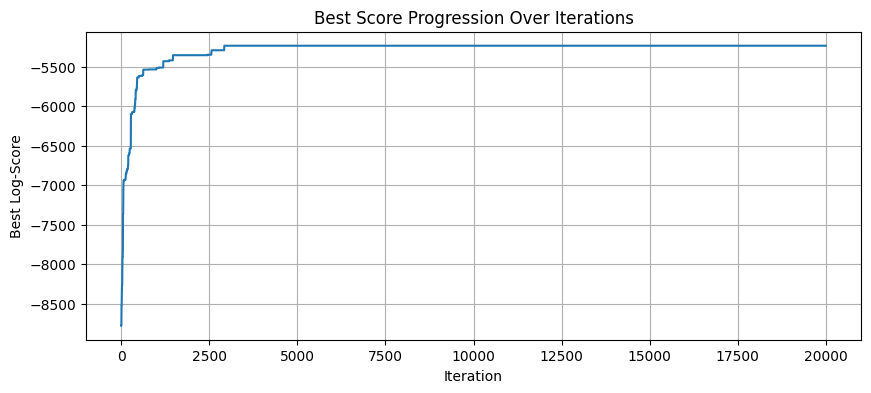

In [9]:
import matplotlib.pyplot as plt

# Plot score over iterations
plt.figure(figsize=(10, 4))
plt.plot(score_history)
plt.title('Best Score Progression Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Log-Score')
plt.grid(True)
plt.show()